In [1]:
from mpl_toolkits.mplot3d import Axes3D # import for 3D viewing

# other imports
import numpy 
from matplotlib import pyplot, cm
%matplotlib inline

In [2]:
# variable declaration
nx = 250
ny = 250
nt = 200

c = 1

dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

sigma = 0.2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

# set the initial conditions, square function

u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

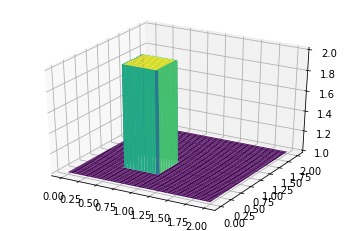

In [3]:
# visualising the initial conditions
fig = pyplot.figure()
ax = fig.gca(projection = '3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap = cm.viridis)

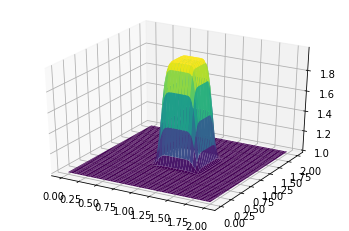

In [4]:
# stepping in time, vectorized implementation
for n in range(nt + 1):
    un = u.copy()
    
    u[1:, 1:] = un[1:, 1:] - c * dt / dx * (un[1:, 1:] - un[1:, :-1]) - c * dt / dy * (un[1:, 1:] - un[:-1, 1:])
        
    u[0, :] = 1
    u[:, 0] = 1
    u[-1, :] = 1
    u[:, -1] = 1
    
# plot solution
fig = pyplot.figure()
ax = fig.gca(projection = '3d')
surf2 =  ax.plot_surface(X, Y, u[:], cmap = cm.viridis)
